### Análise de Mercado SNC-Lavalin

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
count,630.000000,618.000000,600.000000,600.000000,558.000000,611.000000,557.000000,614.000000
mean,37.016550,51.769204,91748.343333,48.084007,7619.261715,1397.097218,4.007816,79.892866
std,13.951167,4.469329,12394.520812,4.874371,2429.045875,162.742630,0.563307,12.162333
min,15.461376,33.382996,63570.000000,34.099998,3242.484375,1176.199951,3.145100,61.600000
25%,23.865421,51.051081,81659.250000,44.833831,6330.620605,1282.599976,3.729400,68.475000
50%,33.949129,52.878073,91661.000000,48.583868,7648.363525,1328.199951,3.882000,80.275000
75%,52.293365,54.730353,100983.000000,51.300627,9272.638184,1504.599976,4.151500,88.130000
max,59.518909,56.965736,119528.000000,60.594360,17429.498047,1800.400024,5.886400,112.080000


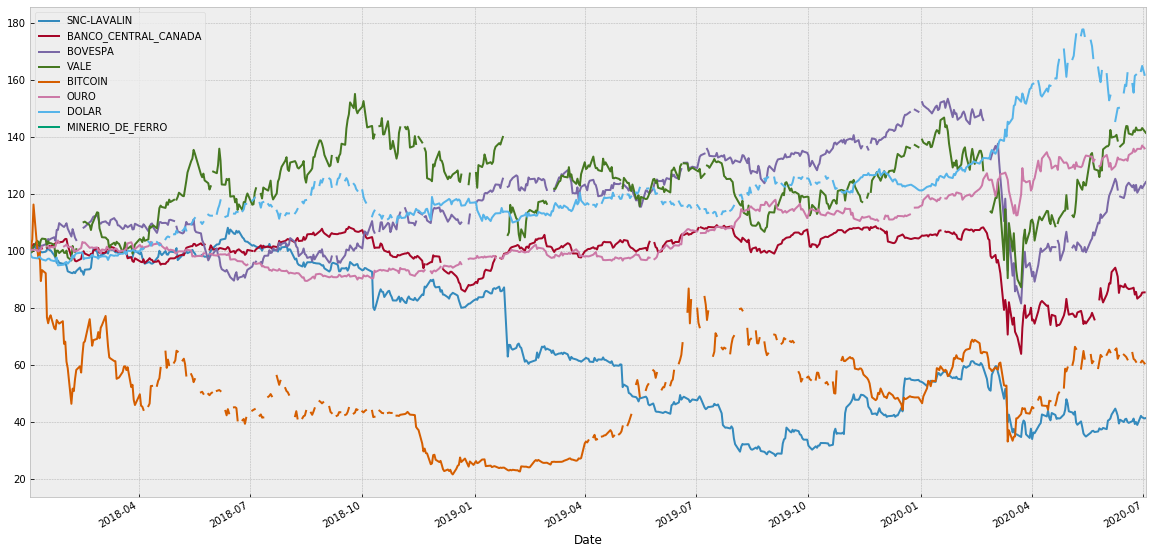

In [2]:
t_names = ['SNC-LAVALIN', 'BANCO_CENTRAL_CANADA', 'BOVESPA', 'VALE', 'BITCOIN', 'OURO', 'DOLAR', 'MINERIO_DE_FERRO']
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA', 'BTCUSD=X', 'GC=F', 'USDBRL=X']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']


df.set_axis(t_names, axis='columns', inplace=True)

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

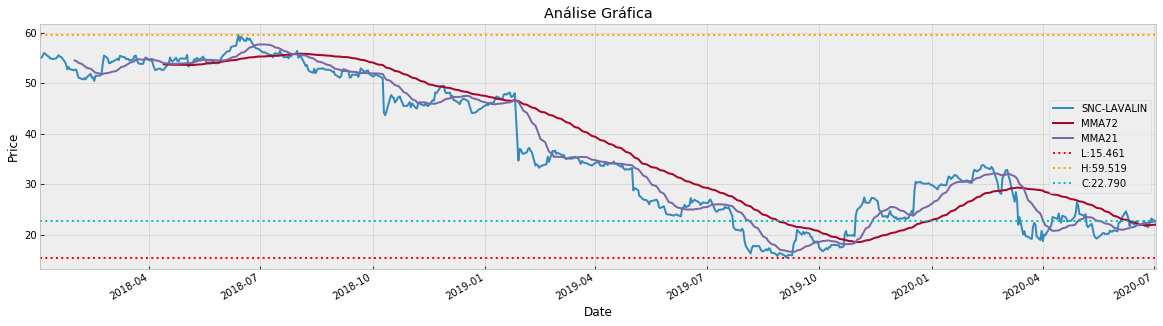

In [3]:
df[t_names[0]].plot(figsize=(20,5))
df[t_names[0]].rolling(72).mean().plot(label='MMA72')
df[t_names[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[t_names[0]].min(), color='r', linestyle=':', label=f'L:{df[t_names[0]].min():0.3f}')
plt.axhline(df[t_names[0]].max(), color='orange', linestyle=':', label=f'H:{df[t_names[0]].max():0.3f}')
plt.axhline(df[t_names[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[t_names[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()

In [4]:
df.tail(7)

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-24,21.639999,44.240002,94377.0,55.389999,9264.809570,1771.000000,5.3466,98.75
2020-06-25,22.010000,44.740002,95983.0,56.000000,9162.920898,1775.900024,5.3595,98.20
2020-06-26,21.459999,43.500000,93834.0,55.619999,NaN,1784.800049,NaN,98.05
2020-06-29,23.209999,44.099998,95735.0,55.630001,9137.995117,1784.699951,5.4021,94.80
2020-06-30,22.910000,44.610001,95056.0,55.919998,9228.163086,1800.400024,5.4617,95.58
2020-07-02,22.709999,44.650002,96235.0,55.490002,9077.444336,1787.099976,5.3589,92.68
2020-07-03,22.790001,NaN,96765.0,55.259998,NaN,NaN,NaN,NaN


In [5]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [6]:
log_returns.tail()

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
Date,,,,,,,,
2020-06-26,-0.025306,-0.028107,-0.022644,-0.006809,NaN,0.004999,NaN,-0.001529
2020-06-29,0.078392,0.013699,0.020057,0.000180,NaN,-0.000056,NaN,-0.033708
2020-06-30,-0.013010,0.011498,-0.007118,0.005199,0.009819,0.008759,0.010972,0.008194
2020-07-02,-0.008768,0.000896,0.012327,-0.007719,-0.016467,-0.007415,-0.019001,-0.030811
2020-07-03,0.003517,NaN,0.005492,-0.004154,NaN,NaN,NaN,NaN


In [7]:
std_returns * 100

SNC-LAVALIN             3.326792
BANCO_CENTRAL_CANADA    1.819070
BOVESPA                 2.061080
VALE                    2.681969
BITCOIN                 4.907925
OURO                    0.972028
DOLAR                   1.068041
MINERIO_DE_FERRO        1.955401
dtype: float64

In [8]:
var_returns * 100

SNC-LAVALIN             1.749932
BANCO_CENTRAL_CANADA    0.523201
BOVESPA                 0.671676
VALE                    1.137306
BITCOIN                 3.808604
OURO                    0.149392
DOLAR                   0.180362
MINERIO_DE_FERRO        0.604563
dtype: float64

In [9]:
cov_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,0.276689,0.073853,0.073222,0.074982,0.078945,-0.001176,-0.015642,0.011606
BANCO_CENTRAL_CANADA,0.073853,0.082725,0.071832,0.080128,0.060549,-0.001335,-0.008260,0.014980
BOVESPA,0.073222,0.071832,0.106201,0.095537,0.079268,-0.001202,-0.010549,0.011092
VALE,0.074982,0.080128,0.095537,0.179824,0.082673,-0.000030,-0.004690,0.037218
BITCOIN,0.078945,0.060549,0.079268,0.082673,0.602193,0.007850,-0.006363,0.006730
OURO,-0.001176,-0.001335,-0.001202,-0.000030,0.007850,0.023621,0.000119,-0.004067
DOLAR,-0.015642,-0.008260,-0.010549,-0.004690,-0.006363,0.000119,0.028518,-0.000090
MINERIO_DE_FERRO,0.011606,0.014980,0.011092,0.037218,0.006730,-0.004067,-0.000090,0.095590


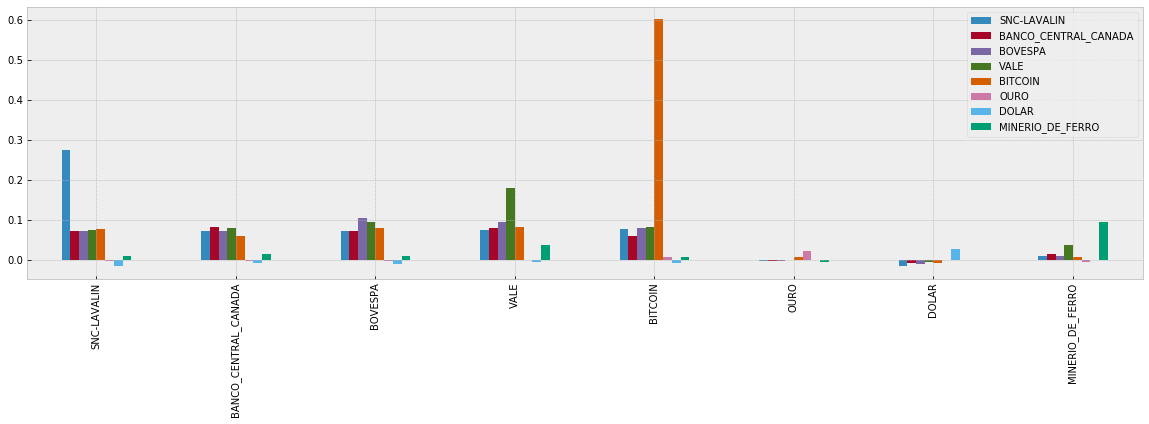

In [10]:
cov_returns[t_names].plot(kind='bar', figsize=(20,5))

In [11]:
cor_returns

,SNC-LAVALIN,BANCO_CENTRAL_CANADA,BOVESPA,VALE,BITCOIN,OURO,DOLAR,MINERIO_DE_FERRO
SNC-LAVALIN,1.000000,0.481211,0.462265,0.363789,0.180835,-0.014241,-0.164496,0.070062
BANCO_CENTRAL_CANADA,0.481211,1.000000,0.754027,0.647880,0.252866,-0.030036,-0.156627,0.167696
BOVESPA,0.462265,0.754027,1.000000,0.691327,0.294375,-0.023383,-0.179116,0.108409
VALE,0.363789,0.647880,0.691327,1.000000,0.237026,-0.000449,-0.061473,0.280786
BITCOIN,0.180835,0.252866,0.294375,0.237026,1.000000,0.064719,-0.048525,0.028428
OURO,-0.014241,-0.030036,-0.023383,-0.000449,0.064719,1.000000,0.004418,-0.085385
DOLAR,-0.164496,-0.156627,-0.179116,-0.061473,-0.048525,0.004418,1.000000,-0.001740
MINERIO_DE_FERRO,0.070062,0.167696,0.108409,0.280786,0.028428,-0.085385,-0.001740,1.000000


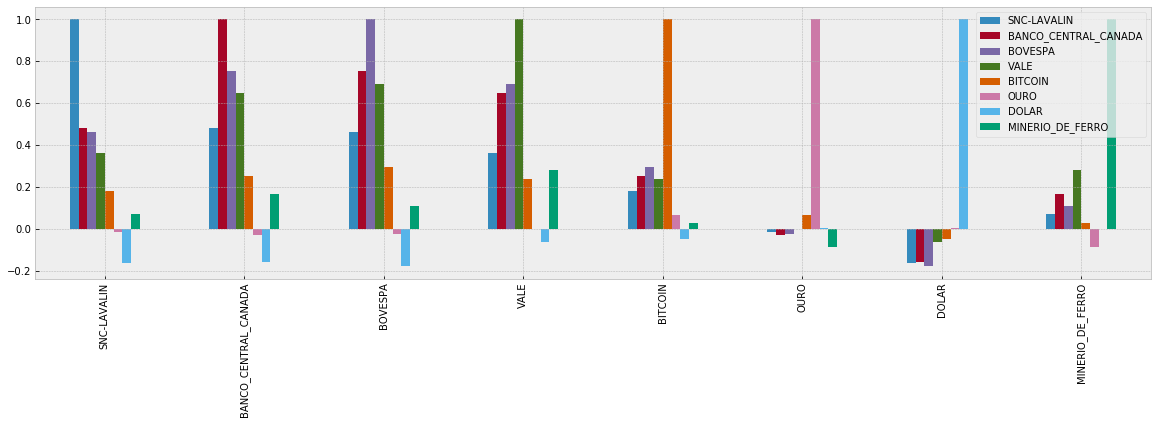

In [12]:
cor_returns.plot(kind='bar', figsize=(20,5))